# NCAA tournament data - Neural Network

In [10]:
#for saving and load data files
import pickle
import numpy as np
import train as train
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.figure
import copy

### Loading NCAA Data

In [11]:
#objects to store data
gameYearData = {} #dictionary with year as key and value is a list of lists containing [team1,team2,overall score] for everygame played by tournament teams
#example: '2000': [['Duke', 'Lamar', 137], ['Kansas', 'DePaul', 158]]

tournamentGameData = {}#dictionary with year as key and value is a list of lists containing [team1,team2,overall score] for everygame in the tournament
#example: '2000': [['Duke', 'Lamar', 137], ['Kansas', 'DePaul', 158]]

teamYearData = {} #dictionary with year as key and value is a dictionary with team as key and value in the form of [[team stats],[opponent stats]] 
#team/oppenent stats: [0G, 1MP, 2FG, 3FGA, 4FG%, 52P, 62PA, 72P%, 83P, 93PA, 103P%, 11FT, 12FTA, 13FT%, 14ORB, 15DRB, 16TRB, 17AST, 18STL, 19BLK, 20TOV, 21PF, 22PTS, 23PTS/G]
#example: '2000': {'Duke': [[34, '', 1045, 2172, 0.481, 761, 1430, 0.532, 284, 742, 0.383, 618, 833, 0.742, 453, 860, 1313, 584, 333, 191, 480, 552, 2992, 88.0], [34, '', 934, 2238, 0.417, 737, 1686, 0.437, 197, 552, 0.357, 360, 537, 0.67, 526, 757, 1283, 472, 240, 123, 607, 690, 2425, 71.3]]}

In [12]:
#webscraping has already been run and the data is saved in files: tournamentGameData.pickle, teamYearData.pickle
#open dicts from file

pickle_in1 = open("teamYearData.pickle","rb")
teamYearData = pickle.load(pickle_in1)

pickle_in2 = open("gameYearData.pickle","rb")
gameYearData = pickle.load(pickle_in2)

pickle_in3 = open("tournamentGameData.pickle","rb")
tournamentGameData = pickle.load(pickle_in3)

### Data Formatting Functions

In [13]:
def removeTournamentGamesFromData(year): 
    
    newGameYearData=copy.deepcopy(gameYearData)
    newGameYearData[year] = []
    
    for game in gameYearData[year]:
        duplicate = False
        for gameCompare in tournamentGameData[year]:
            if game[2] == gameCompare[2]:
                if (game[0]==gameCompare[0] and game[1]==gameCompare[1]) or (game[1]==gameCompare[0] and game[0]==gameCompare[1]):
                    duplicate = True
        if not duplicate:
            newGameYearData[year].append(game)

    return newGameYearData

In [38]:
def formatData(yearRange,gameData):
    #formatting data for use in nn
    acceptedTeamStats = [4,10,12,13,16,17,20,23]
    acceptedOpponentStats = [4,10,12,13,16,17,20,233]
#2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,23
    years = [i for i in range(yearRange[0],yearRange[1]+1)]

    data = []

    for i in years:
        year = str(i)
        singleSeason = gameData[year]
        singleYearTeamData = teamYearData[year]
    
        for game in singleSeason:
            finalScore = game[2]
            teamStats = []
            for j in range(0,2):
                tempTeamStats = singleYearTeamData[game[j]][0]
                tempOpponentStats = singleYearTeamData[game[j]][1]
                for q in range(0,24):
                    if q in acceptedTeamStats:
                        if tempTeamStats[q]=='':
                            print((year,game[j],q))
                        teamStats.append(tempTeamStats[q])
                    if q in acceptedOpponentStats:
                        if tempOpponentStats[q]=='':
                            print((year,game[j],q))
                        teamStats.append(tempOpponentStats[q])
            teamStats.append(finalScore)
            data.append(teamStats)
            
    formattedData = np.array(data)
    return formattedData

### Formatting Data for use in the Nueral Networks

In [15]:
gameYearData_without2017TourneyData = removeTournamentGamesFromData('2017')

In [16]:
#print(teamYearData['2007']['Virginia Military Institute'])
sum2 = 0
sum3 = 0
sum4 = 0
sum16 = 0
for team,game in teamYearData['2007'].items():
    if(game[1][2]!=''):
        sum2 += game[1][2]
    if(game[1][3]!=''):
        sum3 += game[1][3]
    if(game[1][4]!=''):
        sum4 += game[1][4]
    if(game[1][16]!=''):
        sum16 += game[1][16]
    
average2 = sum2/len(teamYearData['2007'])
average2 = int(average2)
average3 = sum3/len(teamYearData['2007'])
average3 = int(average3)
average4 = sum4/len(teamYearData['2007'])
average16 = sum16/len(teamYearData['2007'])
average16 = int(average16)

In [17]:
#these values missing so given the season averge of all teams
teamYearData['2007']['Pepperdine'][1][16] = average16
teamYearData['2007']['Virginia Military Institute'][1][2] = average2
teamYearData['2007']['Virginia Military Institute'][1][3] = average3
teamYearData['2007']['Virginia Military Institute'][1][4] = average4

In [39]:
trainData = formatData([2010,2017],gameYearData_without2017TourneyData)
trainTdata = trainData[:,-1]
trainTdata = np.row_stack(trainTdata)
trainXdata = trainData[:,0:-1]
trainTdata.shape, trainXdata.shape

((15154, 1), (15154, 30))

In [40]:
testData = formatData([2017,2017],tournamentGameData)
testTdata = testData[:,-1]
testTdata = np.row_stack(testTdata)
testXdata = testData[:,0:-1]
testTdata.shape, testXdata.shape

((63, 1), (63, 30))

In [13]:
len(gameYearData['2017']),len(gameYearData_without2017TourneyData['2017'])

(1895, 1833)

In [77]:
len(tournamentGameData['2017'])

63

In [41]:
trainAllData = formatData([2010,2017],gameYearData)
trainAllTdata = trainAllData[:,-1]
trainAllTdata = np.row_stack(trainAllTdata)
trainAllXdata = trainAllData[:,0:-1]
trainAllTdata.shape, trainAllXdata.shape

((15216, 1), (15216, 30))

## Neural Network Testing

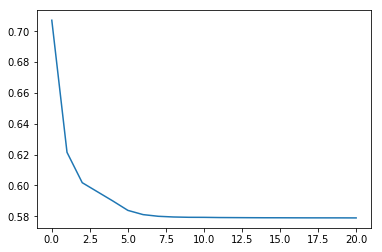

In [30]:
nnet = nn.NeuralNetwork(trainXdata.shape[1], [0], trainTdata.shape[1])
nnet.train(trainXdata, trainTdata, 20)
plt.plot(nnet.getErrorTrace())

In [36]:
iterations = 10
repetitions = 20
nns = [0,2,5,[4,4],[5,5],[1,1,1,1],[3,3,3,3],[3,3,3,3,3]]

#### Training neural network with all games from the 1996-2016 seasons and the regular season of 2017 as training data and with all tournament games from the 2017 season as testing data

0 done
2 done
5 done
[4, 4] done
[5, 5] done
[1, 1, 1, 1] done
[3, 3, 3, 3] done
[3, 3, 3, 3, 3] done

Summary
[0, 15.981417743773642, 14.910537608098881, 0.6320109367370605]
[2, 16.483569401521311, 15.095070074234746, 3.6171228885650635]
[5, 17.173493594157264, 15.697220327215978, 3.853358030319214]
[[4, 4], 16.650878842146295, 15.284746425271194, 4.497853755950928]
[[5, 5], 16.791396736524408, 15.439465036914285, 4.35353684425354]
[[1, 1, 1, 1], 17.890770486767941, 16.675500207424534, 3.0455617904663086]
[[3, 3, 3, 3], 17.405029647495564, 16.137132113564856, 5.6349122524261475]
[[3, 3, 3, 3, 3], 17.880157953835649, 16.50436726725383, 5.888658046722412]

Best
[0, 15.981417743773642, 14.910537608098881, 0.6320109367370605]



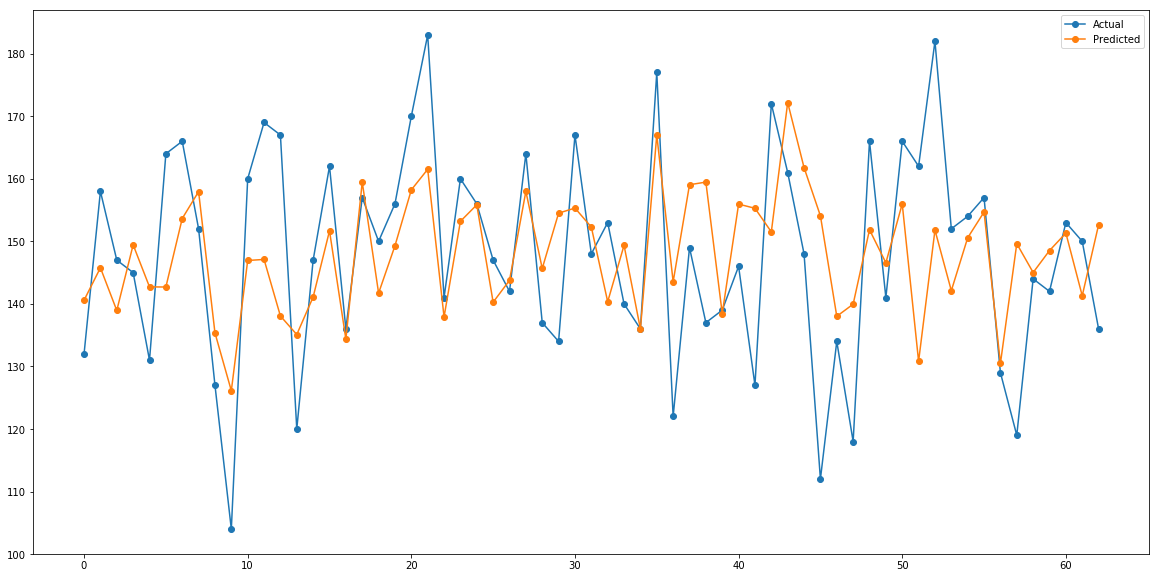

In [42]:

results = train.trainNNsWithTrainData(trainXdata, trainTdata, testXdata,testTdata, nns, repetitions, iterations)
print("")

print("Summary")
summary = train.summarize(results)
for temp in summary:
    print(temp)
print("")
    
print("Best")
best = train.bestNetwork(summary)
print(best)
print("")

nnet = nn.NeuralNetwork(trainXdata.shape[1], best[0], trainTdata.shape[1])
nnet.train(trainXdata, trainTdata, nIterations=iterations)
YtestData = nnet.use(testXdata)

plt.figure(figsize=(20,10))
plt.plot(testTdata[:,0],'o-',label="Actual")
plt.plot(YtestData[:,0],'o-',label="Predicted")
plt.legend()

#### Training neural network with 80% of games from the 1996-2017 seasons as training data and with the remaining 20% as testing data

0 done
2 done
5 done
[4, 4] done
[5, 5] done
[1, 1, 1, 1] done
[3, 3, 3, 3] done
[3, 3, 3, 3, 3] done

Summary
[0, 15.987051535641246, 15.958398728643894, 0.5396838188171387]
[2, 16.856230706482894, 16.839394824817198, 3.064201831817627]
[5, 17.165271897912323, 17.16112417346622, 2.7565152645111084]
[[4, 4], 16.614693984169321, 16.646315352619972, 3.797842025756836]
[[5, 5], 16.644344238180725, 16.646274829971698, 4.343029975891113]
[[1, 1, 1, 1], 17.721229328809322, 17.811396613146862, 2.716938018798828]
[[3, 3, 3, 3], 17.126095442660308, 17.211785503928812, 4.644361972808838]
[[3, 3, 3, 3, 3], 17.796406630412996, 17.751183004927913, 4.906812906265259]

Best
[0, 15.987051535641246, 15.958398728643894, 0.5396838188171387]



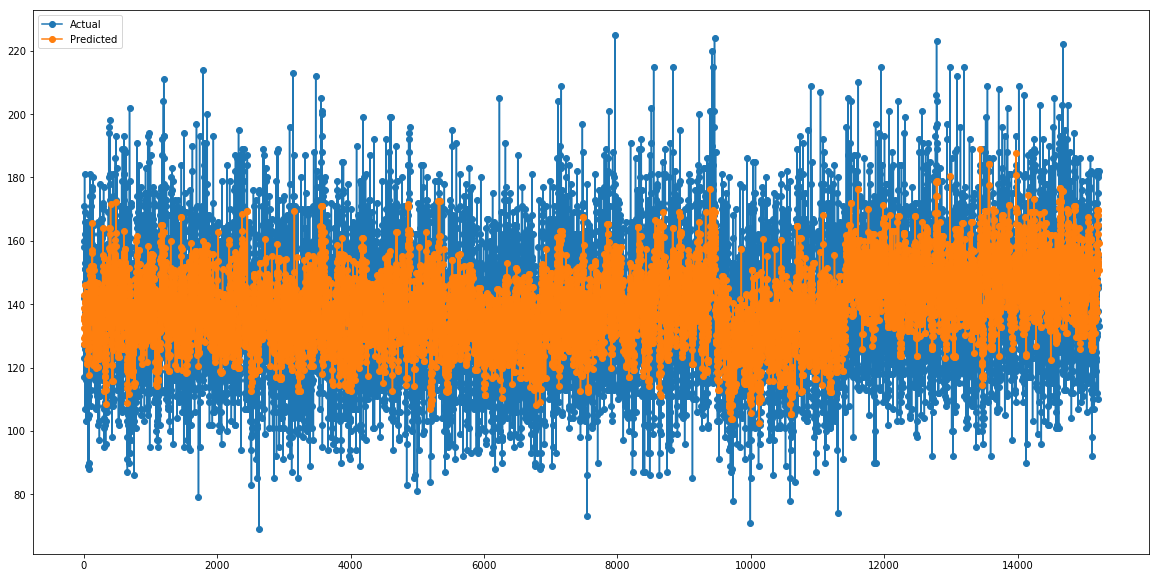

In [43]:
results = train.trainNNs(trainAllXdata, trainAllTdata, .8, nns, repetitions, iterations)
print("")

print("Summary")
summary = train.summarize(results)
for temp in summary:
    print(temp)
print("")
    
print("Best")
best = train.bestNetwork(summary)
print(best)
print("")

nnet = nn.NeuralNetwork(trainAllXdata.shape[1], best[0], trainAllTdata.shape[1])
nnet.train(trainAllXdata, trainAllTdata, nIterations=iterations)
YtestData = nnet.use(trainAllXdata)

plt.figure(figsize=(20,10))
plt.plot(trainAllTdata[:,0],'o-',label="Actual")
plt.plot(YtestData[:,0],'o-',label="Predicted")
plt.legend()

In [44]:
YtestData[:,0]

array([ 135.017304  ,  132.33271776,  142.83244141, ...,  169.75606221,
        150.92503854,  159.34922519])